                                                IBM ASSIGNMENT 4

IMPORTING THE REQUIRED PACKAGE

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

LOADING THE DATASET

In [3]:
d=pd.read_csv("Mall_Customers.csv")
d

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
d=d.rename(columns = {'Annual Income (k$)' : 'Annual_Income','Spending Score (1-100)' : 'Spending_Score'})
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
d.shape

(200, 5)

In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


PERFORM VISUALIZATIONS

UNIVARIATE ANALYSIS

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

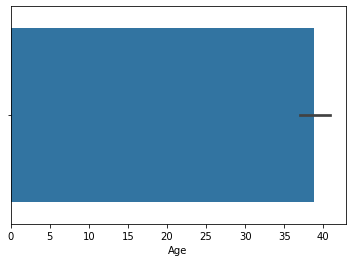

In [7]:
sns.barplot(d.Age)

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Gender'>

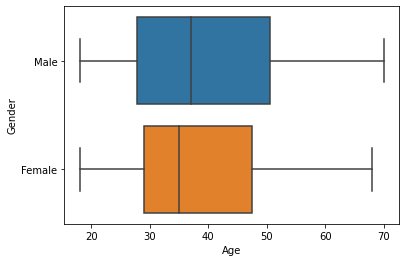

In [15]:
sns.boxplot(y=d.Gender,x=d.Age)

MULTIVARIATE ANALYSIS

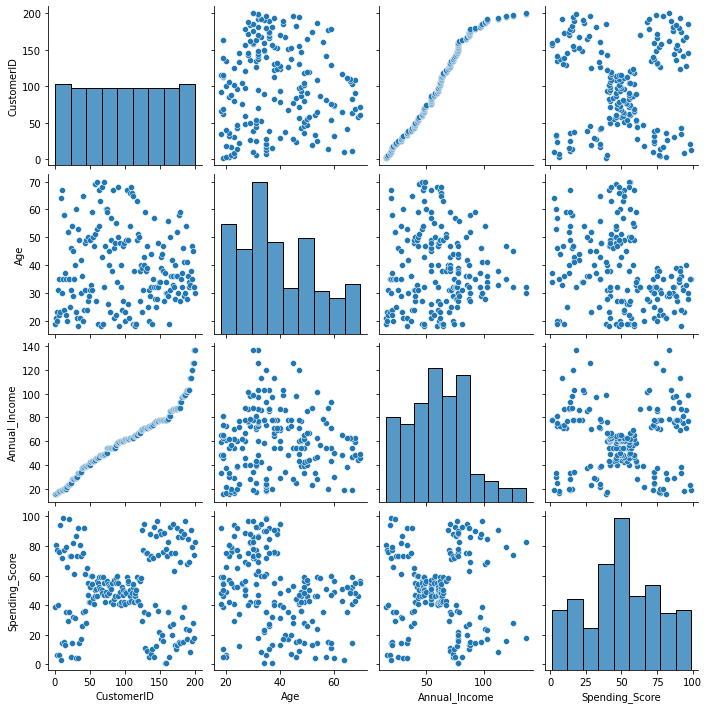

In [16]:
sns.pairplot(d)

 PERFORM DESCRIPTIVE STATISTICS ON THE DATASET

In [18]:
d.describe(include='all')

,CustomerID,Gender,Age,Annual_Income,Spending_Score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


CHECKING FOR MISSING VALUES

In [19]:
d.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

FINDING THE OUTLIERS AND REPLACING THEM

C:\Users\Apurva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income'>

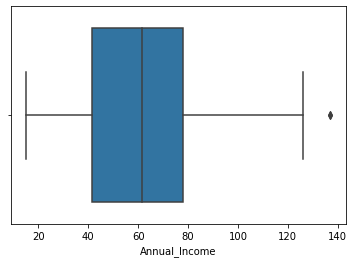

In [20]:
sns.boxplot(d['Annual_Income'])

In [21]:
q1 = d.Annual_Income.quantile(0.25)
q2 = d.Annual_Income.quantile(0.75)
IQR = q2 - q1
print(IQR)

36.5


In [22]:
d=d[~((d.Annual_Income<(q1-1.5*IQR))|(d.Annual_Income>(q2+1.5*IQR)))]
d

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


CHECK FOR CATEGORICAL COLUMN AND PERFORM ENCODING

In [25]:
d.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
d.Gender = le.fit_transform(d.Gender)

d.head()

C:\Users\Apurva\AppData\Local\Temp\ipykernel_7192\674852927.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.Gender = le.fit_transform(d.Gender)


,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


 SCALING THE DATA

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(d)
data_scaled[0:5]

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00507614, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01015228, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01522843, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.02030457, 0.        , 0.25      , 0.01801802, 0.39795918]])

9.PERFORM CLUSTERING ALGORITHM

In [28]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([1, 1, 7, 7, 7, 7, 0, 7, 2, 7, 2, 7, 0, 7, 2, 1, 7, 1, 2, 7, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 7, 2, 7, 2, 1, 0, 7, 0, 7, 0, 7, 0, 1, 2, 7,
       0, 7, 0, 7, 7, 7, 0, 1, 7, 2, 0, 2, 0, 2, 7, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 7, 2, 0, 0, 0, 2, 1, 0, 2, 7, 0, 2, 1, 2, 0, 7, 2, 0, 7,
       7, 0, 0, 1, 2, 0, 0, 1, 0, 7, 2, 1, 7, 0, 2, 1, 2, 7, 0, 2, 2, 2,
       2, 5, 0, 1, 5, 5, 0, 0, 0, 0, 6, 3, 5, 6, 3, 5, 4, 6, 4, 6, 4, 6,
       3, 5, 4, 5, 3, 6, 4, 5, 3, 6, 3, 5, 4, 6, 4, 5, 3, 6, 4, 6, 3, 5,
       3, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 4, 5, 3, 6, 4, 6, 4, 6, 3, 5,
       4, 6, 4, 6, 3, 5, 4, 5, 3, 6, 3, 6, 3, 5, 3, 5, 4, 5, 3, 5, 3, 6])

In [29]:
data1 = pd.DataFrame(data_scaled, columns = d.columns)
data1.drop('CustomerID',axis=1,inplace=True)
data1.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [30]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual_Income,Spending_Score,kclus
0,1.0,0.019231,0.000000,0.387755,1
1,1.0,0.057692,0.000000,0.816327,1
2,0.0,0.038462,0.009009,0.051020,7
3,0.0,0.096154,0.009009,0.775510,7
4,0.0,0.250000,0.018018,0.397959,7


In [31]:
data1['kclus'].unique()

array([1, 7, 0, 2, 5, 6, 3, 4])

In [32]:
data1['kclus'].value_counts()

0    38
7    30
2    27
5    25
1    22
3    19
4    19
6    18
Name: kclus, dtype: int64

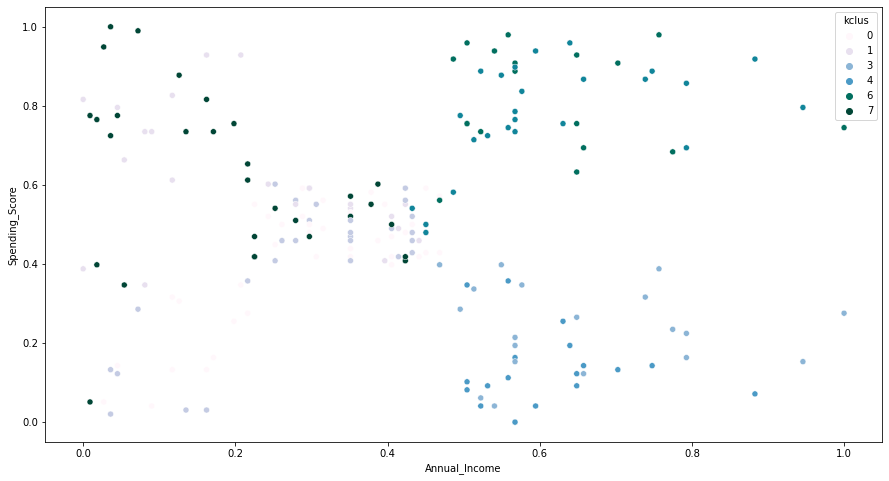

In [33]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual_Income'],
                y=data1['Spending_Score'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [34]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959


In [35]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,1
1,1
2,7
3,7
4,7


SPLITTING THE DATASET INTO TEST AND TRAIN DATA

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual_Income,Spending_Score
124,0.0,0.096154,0.495495,0.285714
97,0.0,0.173077,0.405405,0.500000
42,1.0,0.576923,0.216216,0.357143
17,1.0,0.038462,0.054054,0.663265
5,0.0,0.076923,0.018018,0.765306


In [38]:
x_test.head()

,Gender,Age,Annual_Income,Spending_Score
175,0.0,0.230769,0.657658,0.867347
40,0.0,0.903846,0.207207,0.346939
34,0.0,0.596154,0.162162,0.132653
90,0.0,0.961538,0.396396,0.551020
145,1.0,0.192308,0.558559,0.979592


In [39]:
y_train.head()

,kclus
124,3
97,7
42,2
17,1
5,7


In [40]:
x_test.head()

,Gender,Age,Annual_Income,Spending_Score
175,0.0,0.230769,0.657658,0.867347
40,0.0,0.903846,0.207207,0.346939
34,0.0,0.596154,0.162162,0.132653
90,0.0,0.961538,0.396396,0.551020
145,1.0,0.192308,0.558559,0.979592


In [41]:
y_test.head()

,kclus
175,5
40,0
34,0
90,0
145,6


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[5.2463805 ],
       [0.85639848],
       [1.39093078],
       [1.54477297],
       [5.05517501]])

MEASURE THE PERFORMANCE USING METRICS

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  4.567650049225117
The Root mean squared error is:  2.1372061316646827
The Mean absolute error is:  1.7459518423760507
The accuracy is:  0.3550541191869149
